In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, Dropout, LSTM,Conv1D, TimeDistributed, Flatten, SpatialDropout1D, GlobalAveragePooling1D, SimpleRNN, MaxPooling1D, GlobalMaxPooling1D, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from numpy import genfromtxt

/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/niall/opt/anaconda3/envs/DCUML

In [2]:
def get_data():
    input_file = '/Users/niall/Documents/Cypress_Code/Data/Multipath/multi_test_one.csv'
    my_data_flipped = genfromtxt(input_file, delimiter=',')

    new_data = np.delete(my_data_flipped, (0), axis=0)
    X2 = np.delete(new_data, (0,39), axis=1)
    Y2 = new_data[:,39]
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, random_state=42, shuffle=True)
    X_train = np.array(X_train).reshape((np.shape(X_train)[0], 1, np.shape(X_train)[1]))
    X_test = np.array(X_test).reshape((np.shape(X_test)[0], 1, np.shape(X_test)[1]))

    return X_train, X_test, y_train, y_test

In [3]:
flip_bit_data = get_data()

In [4]:
X_train = flip_bit_data[0]
X_test = flip_bit_data[1]
y_train = flip_bit_data[2]
y_test = flip_bit_data[3]

In [5]:
num_neurons = 38
num_features = 38


model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 38)             11704     
_________________________________________________________________
lstm_1 (LSTM)                (None, 38)                11704     
_________________________________________________________________
dense (Dense)                (None, 1)                 39        
Total params: 23,447
Trainable params: 23,447
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
print('Training LSTM...')

batch_size = 5

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

Training LSTM...
Train on 15000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
15000/15000 [==============================] - 13s 886us/sample - loss: 0.1402 - acc: 0.9482 - val_loss: 0.1144 - val_acc: 0.9576
Epoch 2/5
15000/15000 [==============================] - 12s 786us/sample - loss: 0.0870 - acc: 0.9664 - val_loss: 0.1112 - val_acc: 0.9574
Epoch 3/5
15000/15000 [==============================] - 11s 756us/sample - loss: 0.0699 - acc: 0.9724 - val_loss: 0.1266 - val_acc: 0.9558
Epoch 4/5
15000/15000 [==============================] - 11s 742us/sample - loss: 0.0554 - acc: 0.9791 - val_loss: 0.1376 - val_acc: 0.9560
Epoch 5/5
15000/15000 [==============================] - 11s 738us/sample - loss: 0.0433 - acc: 0.9842 - val_loss: 0.1516 - val_acc: 0.9530


5000/5000 [==============================] - 0s 38us/sample - loss: 0.1516 - acc: 0.9530
Test Loss:  0.15159602031111719
Test Accuracy 0.953
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


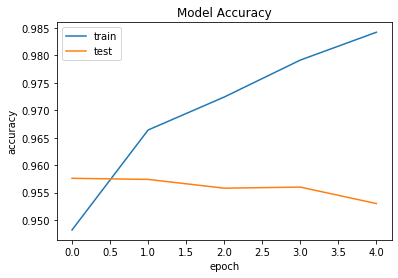

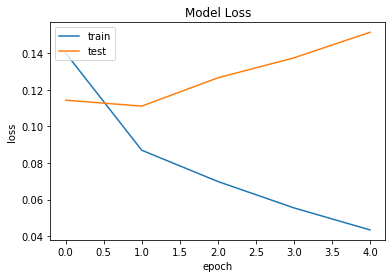

In [10]:
score = model.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
yhat = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, yhat)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)

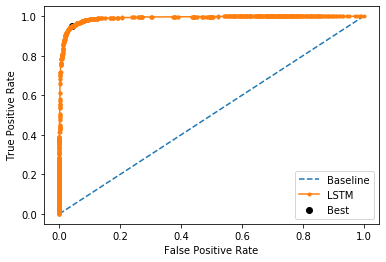

In [15]:
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='LSTM')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.savefig('/Users/niall/Documents/Cypress_Code/Plots/Multipath/LSTM_ROC.png')
plt.show()


In [16]:
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print('ROC AUC=%.3f' % (roc_auc_score(y_test, yhat_new)))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    
yhat_new = model.predict_classes(X_test)
metrics(yhat_new, y_test)

F1-score:  0.9537674601613221
Precision:  0.9603803486529319
Recall:  0.9472450175849941
Acuracy:  0.953
ROC AUC=0.953
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2441
           1       0.96      0.95      0.95      2559

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



In [ ]:
y_preds_lstm_minus = model_avg_from_disc.predict(X_test, batch_size=1)

In [ ]:
pred_avg = pd.DataFrame(y_preds_lstm_minus, columns =['Y_pred']) 
pred_avg['Label'] = y_test

In [ ]:
pred_avg.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/LSTM/Multipath/model_one_channel_three.csv', index = False)

In [ ]:
# Let's save the model to disc
json = model.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/LSTM/Multipath/model_one_channel_three.json", "w") as file:
    file.write(json)
model.save_weights("/Users/niall/Documents/Cypress_Code/Models/LSTM/Multipath/model_one_channel_three.h5")
print("Saved model to disc")

In [ ]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/LSTM/Multipath/model_one_channel_three.json', 'r')
json = json_file.read()
json_file.close()
model_avg_from_disc = model_from_json(json)
model_avg_from_disc.load_weights("/Users/niall/Documents/Cypress_Code/Models/LSTM/Multipath/model_one_channel_three.h5")